<a href="https://colab.research.google.com/github/saivenkatreddy29/TensorFlow-Learning/blob/main/Transfer_learning_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.15.0


In [2]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import tensorflow.keras.callbacks as callbacks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Getting the helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import plot_loss_curves, unzip_data, compare_historys, walk_through_dir

--2024-07-24 02:02:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-07-24 02:02:20 (65.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:

# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")


--2024-07-24 02:02:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  20.6MB/s    in 11s     

2024-07-24 02:02:34 (14.7 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:

# Walk through 10 percent data directory and list number of files
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/tra

In [6]:

# Create training and test directories
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [7]:
import tensorflow as tf
image_size = (224,224)

train_data = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                 image_size = image_size,
                                                                 label_mode = 'categorical',
                                                              )

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                label_mode = 'categorical',
                                                                image_size = image_size)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
checkpoint_path = "food_vision_checkpoint/version1.weights.h5"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                       save_weights_only = True)

In [74]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

In [10]:
base_model.trainable = False
inputs = tf.keras.layers.Input(shape= (224,224,3), name = 'input_layer')

x = base_model(inputs)
print(f"The shape of base model is {x.shape}")

x = layers.GlobalAveragePooling2D(name = 'global_average_pooling_layer')(x)
print(f"After Global Average Pooling shape is {x.shape}")

outputs = layers.Dense(10,activation = 'softmax',name = 'output_layer')(x)

model0 = tf.keras.Model(inputs, outputs)

The shape of base model is (None, 7, 7, 1280)
After Global Average Pooling shape is (None, 1280)


In [11]:
model0.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [12]:
steps_per_epoch = len(train_data)
validation_steps = len(test_data)

In [13]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [45]:
initial_epochs = 3


history = model0.fit(train_data,
                     epochs=initial_epochs,
                     validation_data=test_data,
                     steps_per_epoch=steps_per_epoch,
                     validation_steps=validation_steps,
                     callbacks=[checkpoint_callback])


Epoch 1/3
24/24 [==============================] - ETA: 0s - loss: 1.8877 - accuracy: 0.4307
Epoch 1: val_loss did not improve from 0.45882
24/24 [==============================] - 18s 346ms/step - loss: 1.8877 - accuracy: 0.4307 - val_loss: 1.3391 - val_accuracy: 0.7184
Epoch 2/3
23/24 [===========================>..] - ETA: 0s - loss: 1.1480 - accuracy: 0.7649
Epoch 2: val_loss did not improve from 0.45882
24/24 [==============================] - 8s 327ms/step - loss: 1.1486 - accuracy: 0.7613 - val_loss: 0.9051 - val_accuracy: 0.8084
Epoch 3/3
23/24 [===========================>..] - ETA: 0s - loss: 0.8378 - accuracy: 0.8043
Epoch 3: val_loss did not improve from 0.45882
24/24 [==============================] - 8s 322ms/step - loss: 0.8344 - accuracy: 0.8067 - val_loss: 0.7216 - val_accuracy: 0.8356


In [46]:
model0.evaluate(test_data)

79/79 [==============================] - 5s 59ms/step - loss: 0.7216 - accuracy: 0.8356


[0.7215604782104492, 0.8356000185012817]

In [ ]:
# Check out our model's training curves
plot_loss_curves(history)

In [ ]:

# Check layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 block

In [14]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"


--2024-07-24 02:02:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  22.4MB/s    in 6.9s    

2024-07-24 02:02:53 (18.5 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [15]:
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_1_percent, image_size = image_size,
    label_mode = 'categorical'
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir, image_size = image_size,
    label_mode = 'categorical'
)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


# **Adding Data augumentation as a layer to the model**

In [16]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
], name = 'data_augumentation')

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random


(512, 512, 3)
(1, 512, 512, 3)
(512, 512, 3)


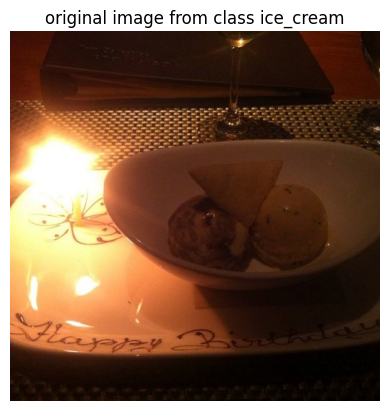

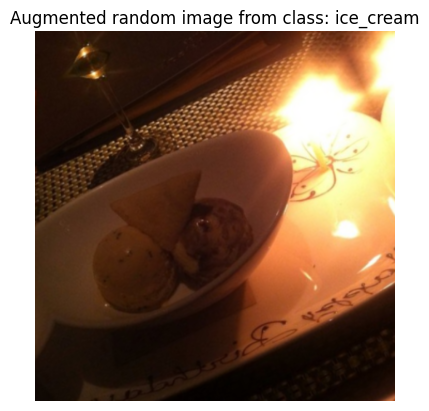

In [17]:
target_class = random.choice(train_data_1_percent.class_names)
target_dir =  "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image

img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f'original image from class {target_class}')
plt.axis(False)

# print(img.shape)
# augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
# plt.figure()
# plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
# plt.title(f"Augmented random image from class: {target_class}")
# plt.axis(False);
# print(tf.squeeze(augmented_img).shape)
print(img.shape)
k = tf.expand_dims(img, axis=0)
print(k.shape)
augmented_img = data_augmentation(img) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow((augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);
print(tf.squeeze(k).shape)

**Model 1 with 1 percent of training data**

In [20]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_1 = tf.keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1_percent = model_1.fit(train_data_1_percent,
                    epochs=5,
                    steps_per_epoch=len(train_data_1_percent),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20240724-002147
Epoch 1/5
3/3 [==============================] - 20s 4s/step - loss: 2.3238 - accuracy: 0.1000 - val_loss: 2.2893 - val_accuracy: 0.1365
Epoch 2/5
3/3 [==============================] - 6s 2s/step - loss: 2.1248 - accuracy: 0.2571 - val_loss: 2.1669 - val_accuracy: 0.1990
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 1.9342 - accuracy: 0.4143 - val_loss: 2.0584 - val_accuracy: 0.2977
Epoch 4/5
3/3 [==============================] - 6s 2s/step - loss: 1.7983 - accuracy: 0.5429 - val_loss: 1.9542 - val_accuracy: 0.3717
Epoch 5/5
3/3 [==============================] - 5s 2s/step - loss: 1.6365 - accuracy: 0.6714 - val_loss: 1.8637 - val_accuracy: 0.4342


In [18]:
input_shape = (224,224,3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape = input_shape, name = 'input layer')

x = data_augmentation(inputs)

x = base_model(x,training = False)

x = layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(10,activation = 'softmax', name = 'output_layer')(x)

model1exp = tf.keras.Model(inputs,outputs)


In [19]:
model1exp.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [26]:
history_1_percent = model1exp.fit(train_data_1_percent,
                               epochs =5,
                               steps_per_epoch = len(train_data_1_percent),
                               validation_data= test_data,
                               validation_steps = int(0.25*len(test_data)),
                              callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20240724-003123
Epoch 1/5
3/3 [==============================] - 15s 3s/step - loss: 2.3113 - accuracy: 0.1857 - val_loss: 2.1952 - val_accuracy: 0.2319
Epoch 2/5
3/3 [==============================] - 6s 2s/step - loss: 2.0872 - accuracy: 0.3429 - val_loss: 2.0902 - val_accuracy: 0.2812
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 1.9173 - accuracy: 0.4000 - val_loss: 1.9665 - val_accuracy: 0.3783
Epoch 4/5
3/3 [==============================] - 5s 2s/step - loss: 1.7701 - accuracy: 0.4429 - val_loss: 1.8695 - val_accuracy: 0.4243
Epoch 5/5
3/3 [==============================] - 6s 2s/step - loss: 1.6479 - accuracy: 0.5429 - val_loss: 1.7672 - val_accuracy: 0.4836


# **Model 2 with 10% of data and data augmentation layer**

In [76]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape = input_shape, name = 'input layer')

x= data_augmentation(inputs)

x = base_model(x, training = False)

x = layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(10, activation = 'softmax')(x)

model2 = tf.keras.Model(inputs,outputs)

In [77]:
model2.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [78]:

# Setup checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_path,
    save_weights_only = True,
    save_best_only = True,
    save_freq= 'epoch',
    verbose = 1
)

In [79]:
history2 = model2.fit(train_data, epochs = 5, validation_data = test_data,
           steps_per_epoch = len(train_data),
           validation_steps = len(test_data),
           callbacks=[checkpoint_callback]
)

Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9528 - accuracy: 0.3667
Epoch 1: val_loss improved from inf to 1.42975, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 31s 990ms/step - loss: 1.9528 - accuracy: 0.3667 - val_loss: 1.4298 - val_accuracy: 0.6600
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3757 - accuracy: 0.6400
Epoch 2: val_loss improved from 1.42975 to 1.04130, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 20s 848ms/step - loss: 1.3757 - accuracy: 0.6400 - val_loss: 1.0413 - val_accuracy: 0.7432
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0910 - accuracy: 0.7187
Epoch 3: val_loss improved from 1.04130 to 0.84414, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 22s 924ms/step - loss: 1.0910 - accuracy: 0.7187 - val

In [80]:

# Evaluate on the test data
results_10_percent_data_aug = model2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 6s 77ms/step - loss: 0.6576 - accuracy: 0.8200


[0.6575729250907898, 0.8199999928474426]

**Model 2 Load weights**

In [50]:
nd2model = model2.load_weights(checkpoint_path)
model2.evaluate(test_data)

79/79 [==============================] - 5s 60ms/step - loss: 0.4588 - accuracy: 0.8528


[0.4588199257850647, 0.8528000116348267]

In [47]:
loaded_results = model0.evaluate(test_data)

79/79 [==============================] - 5s 60ms/step - loss: 0.7216 - accuracy: 0.8356


[0.721560537815094, 0.8356000185012817]

# **Fine Tuning the top 10 layers**

In [81]:
len(base_model.trainable_variables)

0

In [82]:
model2_base_model = model2.layers[2]

In [83]:
len(model2.trainable_variables)

2

In [84]:
len(model2_base_model.layers)

270

In [85]:
(model2_base_model.trainable)

False

In [86]:
len(model2_base_model.layers)

270

In [48]:
for layer_number,layer_name in enumerate(model2_base_model.layers):
  print(layer_number,layer_name )

0 <keras.src.engine.input_layer.InputLayer object at 0x7be2d629e680>
1 <keras.src.layers.preprocessing.image_preprocessing.Rescaling object at 0x7be3700f5e10>
2 <keras.src.layers.preprocessing.normalization.Normalization object at 0x7be2b01e9690>
3 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7be2b0285d20>
4 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7be2b01eb1f0>
5 <keras.src.layers.core.activation.Activation object at 0x7be2cc6818a0>
6 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7be2b0054310>
7 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7be2b0055f30>
8 <keras.src.layers.core.activation.Activation object at 0x7be2b01ebd30>
9 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7be2b0056260>
10 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7be2b0057bb0>
11 <keras.src.layers.core.activation.Activation object at 0x7be2b01ea260>
12 <keras.src

In [87]:
model2_base_model.layers[1].trainable

False

In [60]:
for i in range (len(model2_base_model.layers)-1,259,-1):
  print(i)
  model2_base_model.layers[i].trainable = True


269
268
267
266
265
264
263
262
261
260


In [58]:
for i,layer in enumerate(model2_base_model.layers):
  if layer.trainable == True:
    print(i,layer)

260 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7be2546d48e0>
261 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7be2546abdf0>
262 <keras.src.layers.merging.multiply.Multiply object at 0x7be2546d5510>
263 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7be2546d7190>
264 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7be254626020>
265 <keras.src.layers.regularization.dropout.Dropout object at 0x7be25452c310>
266 <keras.src.layers.merging.add.Add object at 0x7be2546d4730>
267 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7be2b01eba00>
268 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7be2b0075420>
269 <keras.src.layers.core.activation.Activation object at 0x7be2b01eaf80>


In [88]:

# Make all the layers in model_2_base_model trainable
model2_base_model.trainable = True

# Freeze all layers except for the last 10
for layer in model2_base_model.layers[:-10]:
  layer.trainable = False

In [89]:
len(model2_base_model.trainable_variables)

10

In [90]:
len(model2.trainable_variables)

12

In [91]:
model2.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),metrics = ['accuracy'])

In [92]:
initial_epoch = 5


In [93]:
final_epoch = initial_epoch+5

fine_tune_history = model2.fit(train_data,
                               epochs = final_epoch,
                               validation_data = test_data,
                              steps_per_epoch = len(train_data),
                               validation_steps = int(0.25* len(test_data)),
                               initial_epoch =history2.epoch[-1],
                               callbacks = [create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20240724-025024
Epoch 5/10
24/24 [==============================] - 26s 692ms/step - loss: 0.7240 - accuracy: 0.8013 - val_loss: 0.5291 - val_accuracy: 0.8372
Epoch 6/10
24/24 [==============================] - 17s 688ms/step - loss: 0.5669 - accuracy: 0.8333 - val_loss: 0.5031 - val_accuracy: 0.8405
Epoch 7/10
24/24 [==============================] - 16s 680ms/step - loss: 0.5662 - accuracy: 0.8187 - val_loss: 0.4958 - val_accuracy: 0.8273
Epoch 8/10
24/24 [==============================] - 17s 662ms/step - loss: 0.5026 - accuracy: 0.8427 - val_loss: 0.4577 - val_accuracy: 0.8454
Epoch 9/10
24/24 [==============================] - 14s 593ms/step - loss: 0.4902 - accuracy: 0.8400 - val_loss: 0.4419 - val_accuracy: 0.8651
Epoch 10/10
24/24 [==============================] - 14s 550ms/step - loss: 0.4313 - accuracy: 0.8667 - val_loss: 0.4710 - val_accuracy: 0.8520


In [94]:
results_fine_tune = model2.evaluate(test_data)

79/79 [==============================] - 6s 61ms/step - loss: 0.4436 - accuracy: 0.8488
